In [ ]:
# Do not use this code under normal circumstances and every time 
%pip install opencv-python matplotlib pillow

In [ ]:
# Do not use this code under normal circumstances and every time 
%pip install opencv-python matplotlib pillow

In [ ]:
!pip list # Do not use this code under normal circumstances and every time

In [1]:
import tensorflow as tf # type: ignore
import os

In [2]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available: ", len(gpus))
    print("GPU Details: ", gpus)
else:
    print("No GPUs Available.")

GPUs Available:  1
GPU Details:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Check CPU availability
cpu = tf.config.list_physical_devices('CPU')
if gpus:
    print("CPUs Available: ", len(cpu))
    print("CPU Details: ", cpu)
else:
    print("No CPUs Available.")

CPUs Available:  1
CPU Details:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
import cv2 # type: ignore
import imghdr # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [5]:
# Define the directory containing your training data
data_dir = r'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\Tumor Training'  # Adjust the path as necessary

# List the classes (subdirectories)
class_names = os.listdir(data_dir)
print("Class names:", class_names)  # This will print the names of the classes (0-9)

# Create a list to hold image paths and labels
image_paths = []
labels = []

# Loop through each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)


Class names: ['glioma', 'meningioma', 'pituitary']


In [6]:
image_exts = ['jpeg','jpg','bmp','png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [9]:
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [10]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, label_mode='int') # the smaller batch size the better. the greater batch size the faster. the ideal batch size is 32

Found 4117 files belonging to 3 classes.


In [11]:
# Assuming 'data' is your dataset
data_iterator = data.as_numpy_iterator()

In [12]:
#get another batch from the iterator
batch = data_iterator.next()

In [13]:
# images as numpy arrays
batch[0].shape # Should print something like (256, height, width, channels)

(32, 256, 256, 3)

In [14]:
# Class 0 = Glioma 
# Class 1 = meningioma
# Class 2 = NoTumor
# Class 3 = Pituitary
batch[1] # Should print the labels for the 256 images

array([2, 2, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 2, 1, 2, 1, 2, 1, 1])

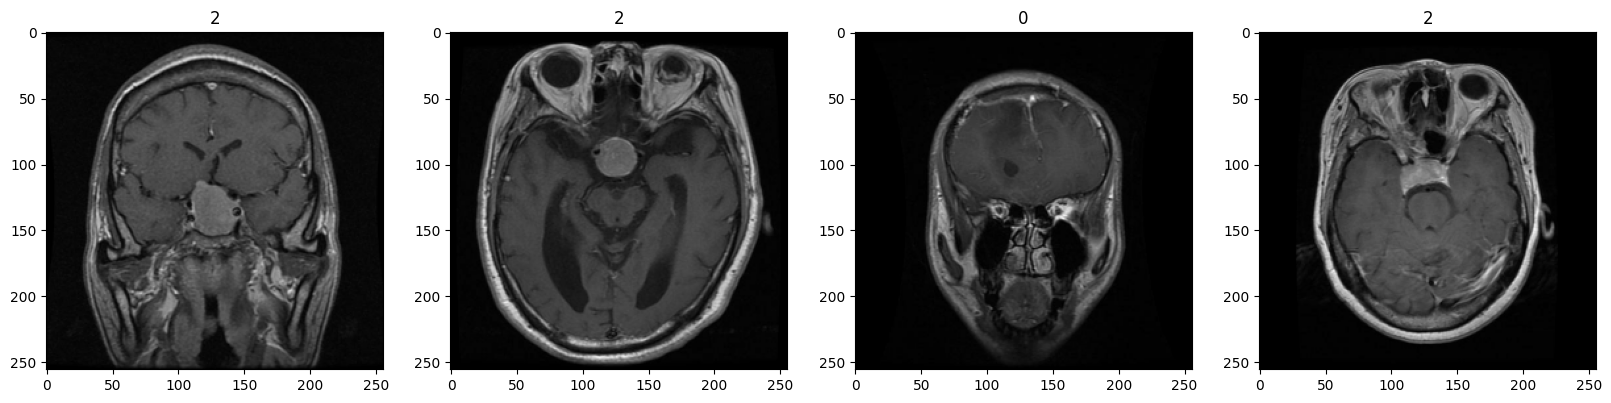

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0] / 255

In [17]:
scaled.max()

1.0

In [18]:
scaled.min()

0.0

In [20]:
if batch[0].max() == 255:
    data = data.map(lambda x, y: (x / 255, y))
    batch = data.as_numpy_iterator().next()
    print('have been changed')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))
else:
    print('no changes')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))

no changes
batch[0].max() = 1.0
batch[0].min() = 0.0


In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

In [23]:
batch[0].max()

1.0

In [24]:
batch[0].min()

0.0

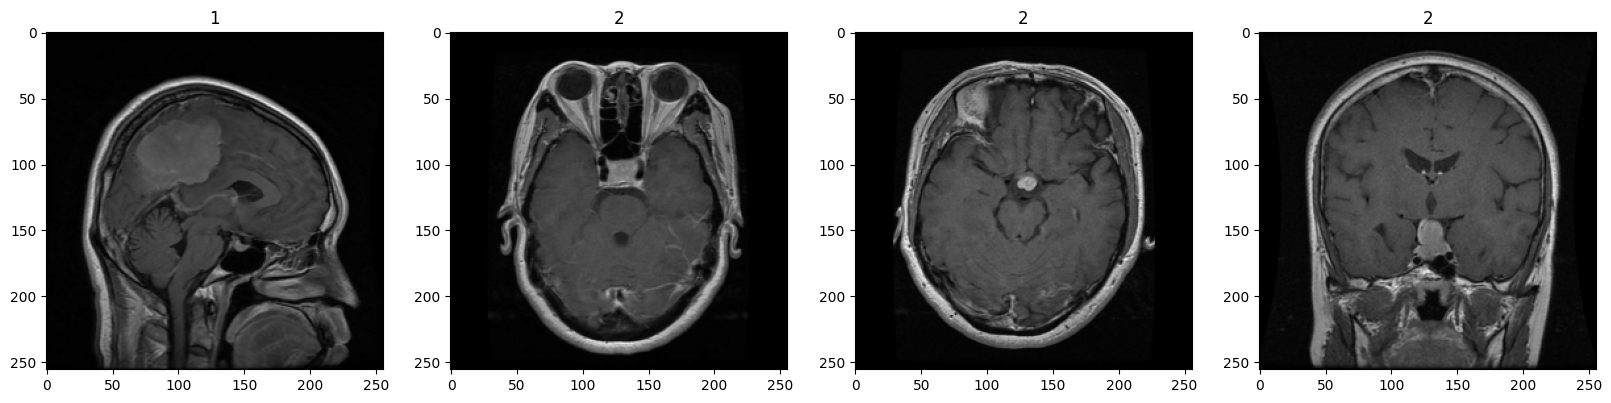

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [26]:
len(data)

129

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*0.2)+1

In [28]:
train_size + val_size + test_size

129

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [30]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='sigmoid'))


In [33]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [35]:
from datetime import datetime

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('(%H.%M.%S)') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)

Formatted date with microseconds: 01.Jan.2025.(20.38.35).227770


In [36]:
logdir = fr'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\logs\logTumorClassification_({str(formatted_date)})' # change it to any log file if u were working on this file

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
batch[0].max()

1.0

In [39]:
batch[0].min()

0.0

In [40]:
hist = model.fit(train, epochs=32, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/32
90/90 [==============================] - 28s 170ms/step - loss: 0.7564 - accuracy: 0.6441 - val_loss: 0.5621 - val_accuracy: 0.7668
Epoch 2/32
90/90 [==============================] - 17s 181ms/step - loss: 0.4329 - accuracy: 0.8253 - val_loss: 0.3518 - val_accuracy: 0.8750
Epoch 3/32
90/90 [==============================] - 14s 158ms/step - loss: 0.2677 - accuracy: 0.8962 - val_loss: 0.2943 - val_accuracy: 0.8870
Epoch 4/32
90/90 [==============================] - 15s 159ms/step - loss: 0.1929 - accuracy: 0.9274 - val_loss: 0.2470 - val_accuracy: 0.9014
Epoch 5/32
90/90 [==============================] - 13s 143ms/step - loss: 0.1243 - accuracy: 0.9583 - val_loss: 0.1410 - val_accuracy: 0.9423
Epoch 6/32
90/90 [==============================] - 14s 149ms/step - loss: 0.0731 - accuracy: 0.9774 - val_loss: 0.2055 - val_accuracy: 0.9423
Epoch 7/32
90/90 [==============================] - 15s 164ms/step - loss: 0.0720 - accuracy: 0.9757 - val_loss: 0.1166 - val_accuracy: 0.9663

In [41]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

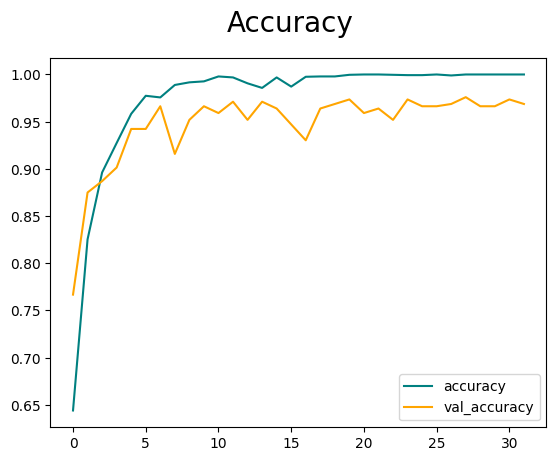

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

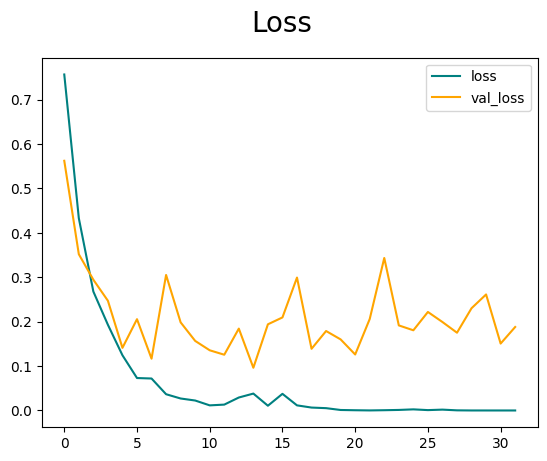

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [45]:
Precision = Precision()
Recall = Recall()
BinAccuracy = BinaryAccuracy()

In [46]:
len(test)

26

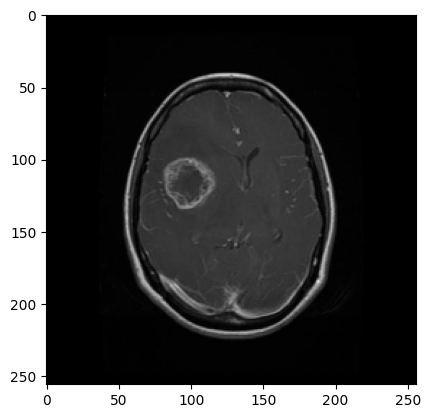

1/1 [==============================] - 0s 365ms/step
Model Prediction: [[1.0000000e+00 9.1862977e-01 5.5404182e-16]]


In [47]:
# Load the image
image_path = fr"C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\Tumor Testing\glioma\Te-gl_0014.jpg"  # Replace with the path to your image
img = cv2.imread(image_path)

# Check if the image is loaded correctly
if img is None:
    raise ValueError(f"Image not found or invalid at path: {image_path}")

# Convert BGR (OpenCV default) to RGB for proper visualization
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image using TensorFlow
resize = tf.image.resize(img, (256, 256))

# Visualize the resized image
plt.imshow(resize.numpy().astype(int))  # Convert to int for visualization
plt.show()

# Normalize the resized image and expand dimensions for prediction
model_input = np.expand_dims(resize.numpy().astype("float32") / 255.0, axis=0)

# Predict using the model
yhat = model.predict(model_input)

# Output the prediction
print("Model Prediction:", yhat)

In [48]:
yhat

array([[1.0000000e+00, 9.1862977e-01, 5.5404182e-16]], dtype=float32)

In [49]:
# Get the class with the highest prediction probability
predicted_class = tf.argmax(yhat, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: "glioma", 1: "meningioma", 2: "pituitary"}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label = label_map.get(predicted_class, "Unknown")

# Output the result based on the predicted label
if predicted_label == "glioma":
    print(f"Image has been Classified as Class 0 (glioma Detected)")
elif predicted_label == "meningioma":
    print(f"Image has been Classified as Class 1 (meningioma Detected)")
elif predicted_label == "pituitary":
    print(f"Image has been Classified as Class 2 (pituitary Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 0 (glioma Detected)


In [50]:
from tensorflow.keras.models import load_model # type: ignore
from datetime import datetime
#import os
#import tensorflow as tf

In [51]:
from datetime import datetime

num_epochs = len(hist.epoch)

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('%H.%M.%S') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)
print("len(hist.epochs) = " + str(num_epochs))

Formatted date with microseconds: 01.Jan.2025.20.48.43.866939
len(hist.epochs) = 32


In [52]:
model.save(os.path.join(r'models',f'TumorClasses_{formatted_date}_{num_epochs}epochs.h5')) # choose the dir that u want to save ur model at

In [54]:
new_model = load_model(os.path.join(r'models', fr'TumorClasses_01.Jan.2025.19.53.15.387435_32epochs.h5')) # choose the dir that u want to load ur model from

In [55]:
yhattest = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 160ms/step


In [56]:
# Get the class with the highest prediction probability
predicted_class_test = tf.argmax(yhattest, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: "glioma", 1: "meningioma", 2: "pituitary"}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label_test = label_map.get(predicted_class_test, "Unknown")

# Output the result based on the predicted label
if predicted_label_test == "glioma":
    print(f"Image has been Classified as Class 0 (glioma Detected)")
elif predicted_label_test == "meningioma":
    print(f"Image has been Classified as Class 1 (meningioma Detected)")
elif predicted_label_test == "pituitary":
    print(f"Image has been Classified as Class 2 (pituitary Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 0 (glioma Detected)


In [57]:
import pandas as pd # type: ignore

# Extracting the metrics
epochs = range(1, len(hist.history['accuracy']) + 1)
accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
validation_loss = hist.history['val_loss']

# Creating a DataFrame with the desired columns
df = pd.DataFrame({
    'Epochs': epochs,
    'Accuracy': accuracy,
    'Validation Accuracy': validation_accuracy,
    'Loss': loss,
    'Validation Loss': validation_loss
})

# Saving the DataFrame to a CSV file
df.to_csv(rf'TumorClassesFirstModel.csv', index=False)

In [59]:
def predictFolderTumorClasses(folder_path, model, class_names):
    """
    Predict the class of each image in the folder and calculate statistics.

    Args:
    folder_path (str): Path to the folder containing subfolders for each class.
    model (tf.keras.Model): Trained model for brain tumor classification.
    class_names (list): List of class names (e.g., ['glioma', 'meningioma', 'pituitary']).

    Returns:
    dict: Accuracy and false positive statistics for each class.
    """
    results = {class_name: {"true_positive": 0, "false_positive": 0, "total": 0} for class_name in class_names}

    # Iterate over subfolders for each class
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.exists(class_folder):
            print(f"Folder for {class_name} not found.")
            continue

        files = os.listdir(class_folder)
        for file in files:
            file_path = os.path.join(class_folder, file)
            
            # Read the image
            img = cv2.imread(file_path)
            if img is None:
                continue

            # Resize the image
            resize = tf.image.resize(img, (256, 256))

            # Normalize and expand dimensions
            img_expanded = np.expand_dims(resize / 255.0, axis=0)

            # Make a prediction
            predictions = model.predict(img_expanded)
            predicted_class = np.argmax(predictions)

            # Update statistics
            if predicted_class == class_names.index(class_name):
                results[class_name]["true_positive"] += 1
            else:
                results[class_names[predicted_class]]["false_positive"] += 1
            results[class_name]["total"] += 1

    # Calculate and print statistics with the true and false counts
    for class_name in class_names:
        if results[class_name]["total"] > 0:
            accuracy = (results[class_name]["true_positive"] / results[class_name]["total"]) * 100
        else:
            accuracy = 0
        print(f"{class_name} - Total Images: {results[class_name]['total']}")
        print(f"{class_name} - True Positives: {results[class_name]['true_positive']}")
        print(f"{class_name} - False Positives: {results[class_name]['false_positive']}")
        print(f"{class_name} - Accuracy: {accuracy:.2f}%")
        print()

    return results

# Define the folder path and class names
folder_path = r"C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\Tumor Testing"
class_names = ['glioma', 'meningioma', 'pituitary']

# Load your trained model
model = tf.keras.models.load_model(r'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\models\TumorClasses_01.Jan.2025.19.53.15.387435_32epochs.h5')

# Test the dataset
results = predictFolderTumorClasses(folder_path, model, class_names)


1/1 [==============================] - 0s 22ms/step
glioma - Total Images: 300
glioma - True Positives: 266
glioma - False Positives: 13
glioma - Accuracy: 88.67%

meningioma - Total Images: 306
meningioma - True Positives: 279
meningioma - False Positives: 35
meningioma - Accuracy: 91.18%

pituitary - Total Images: 300
pituitary - True Positives: 294
pituitary - False Positives: 19
pituitary - Accuracy: 98.00%



In [60]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model(fr'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\models\TumorClasses_01.Jan.2025.19.53.15.387435_32epochs.h5')

In [62]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = r'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\Tumor Testing\meningioma\Te-me_0012.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize image (assuming this is how your model was trained)

In [ ]:
def generate_gradcam_heatmap(model, img_array, target_layer_name):
    # Get the last convolutional layer
    last_conv_layer = model.get_layer(target_layer_name)
    
    # Create a model that outputs both the predictions and the last conv layer's output
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [last_conv_layer.output, model.output]
    )
    
    # Model prediction and class index
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        tape.watch(conv_outputs)
        class_idx = tf.argmax(predictions[0])
        class_channel = predictions[:, class_idx]
    
    # Gradient calculation
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute weighted sum of feature maps
    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap = heatmap / np.max(heatmap)  # Normalize to [0, 1]
    
    return heatmap

C:\Users\shatn\AppData\Local\Temp\ipykernel_3992\1671944033.py:30: RuntimeWarning: invalid value encountered in divide
  heatmap = heatmap / np.max(heatmap)  # Normalize to [0, 1]
C:\Users\shatn\AppData\Local\Temp\ipykernel_3992\3302218905.py:11: RuntimeWarning: invalid value encountered in cast
  heatmap_colored = np.uint8(255 * heatmap_resized)


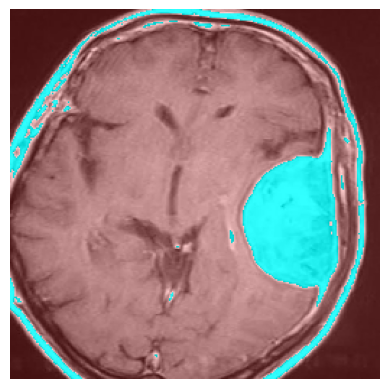

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Generate the heatmap for the last convolutional layer (update layer name if needed)
heatmap = generate_gradcam_heatmap(model, img_array, 'conv2d_2')  # Replace 'conv2d_2' with your layer name

# Resize the heatmap to match the original image size
heatmap_resized = cv2.resize(heatmap, (img.size[0], img.size[1]))

# Convert heatmap to color map (jet)
heatmap_colored = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
img_array = np.array(img)
superimposed_img = heatmap_colored * 0.4 + img_array
superimposed_img = np.uint8(superimposed_img)

# Display the result
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

In [ ]:
!pip list # Do not use this code under normal circumstances and every time

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
altair                       5.5.0
annotated-types              0.7.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        24.3.0
blinker                      1.9.0
cachetools                   5.3.3
certifi                      2024.6.2
charset-normalizer           3.3.2
click                        8.1.8
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
dacite                       1.8.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.0
gast                         0.4.0
gitdb                        4.0.11
GitPython                    3.1.43
google-auth                  2.30.0
goo

In [90]:
import tensorflow as tf # type: ignore
import os

In [91]:
# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available: ", len(gpus))
    print("GPU Details: ", gpus)
else:
    print("No GPUs Available.")

GPUs Available:  1
GPU Details:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [92]:
# Check CPU availability
cpu = tf.config.list_physical_devices('CPU')
if gpus:
    print("CPUs Available: ", len(cpu))
    print("CPU Details: ", cpu)
else:
    print("No CPUs Available.")

CPUs Available:  1
CPU Details:  [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [93]:
import cv2 # type: ignore
import imghdr
from matplotlib import pyplot as plt # type: ignore

In [94]:
# Define the directory containing your training data
data_dir = r'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\Training'  # Adjust the path as necessary

# List the classes (subdirectories)
class_names = os.listdir(data_dir)
print("Class names:", class_names)  # This will print the names of the classes (0-9)

# Create a list to hold image paths and labels
image_paths = []
labels = []

# Loop through each class directory
for class_name in class_names:
    class_dir = os.path.join(data_dir, class_name)


Class names: ['glioma', 'meningioma', 'pituitary']


In [95]:
image_exts = ['jpeg','jpg','bmp','png']

In [96]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [131]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
@six.add_metaclass(abc.ABCMeta)
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Ten

In [132]:
import numpy as np # type: ignore
from matplotlib import pyplot as plt # type: ignore

In [133]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=32, label_mode='int') # the smaller batch size the better. the greater batch size the faster. the ideal batch size is 32

Found 4117 files belonging to 3 classes.


In [134]:
# Assuming 'data' is your dataset
data_iterator = data.as_numpy_iterator()

In [135]:
#get another batch from the iterator
batch = data_iterator.next()

In [136]:
# images as numpy arrays
batch[0].shape # Should print something like (256, height, width, channels)

(32, 256, 256, 3)

In [137]:
# Class 0 = Glioma 
# Class 1 = meningioma
# Class 2 = NoTumor
# Class 3 = Pituitary
batch[1] # Should print the labels for the 256 images

array([1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 2, 0])

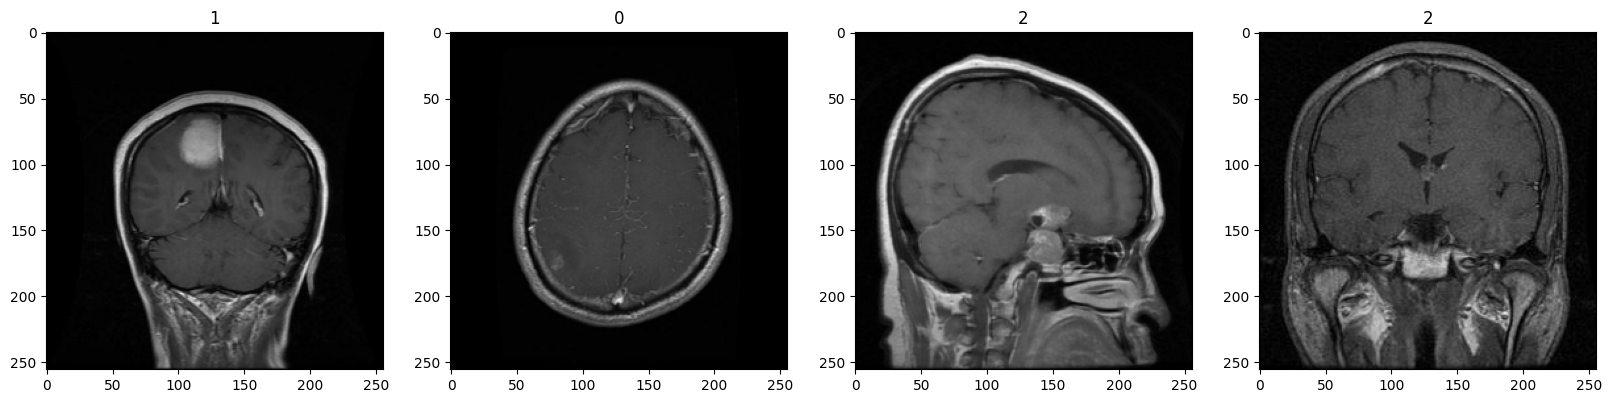

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [139]:
scaled = batch[0] / 255

In [140]:
scaled.max()

1.0

In [141]:
scaled.min()

0.0

In [142]:
if batch[0].max() == 255:
    data = data.map(lambda x, y: (x / 255, y))
    batch = data.as_numpy_iterator().next()
    print('have been changed')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))
else:
    print('no changes')
    print('batch[0].max() = ' + str(batch[0].max()))
    print('batch[0].min() = ' + str(batch[0].min()))

have been changed
batch[0].max() = 1.0
batch[0].min() = 0.0


In [143]:
scaled_iterator = data.as_numpy_iterator()

In [144]:
batch = scaled_iterator.next()

In [145]:
batch[0].max()

1.0

In [146]:
batch[0].min()

0.0

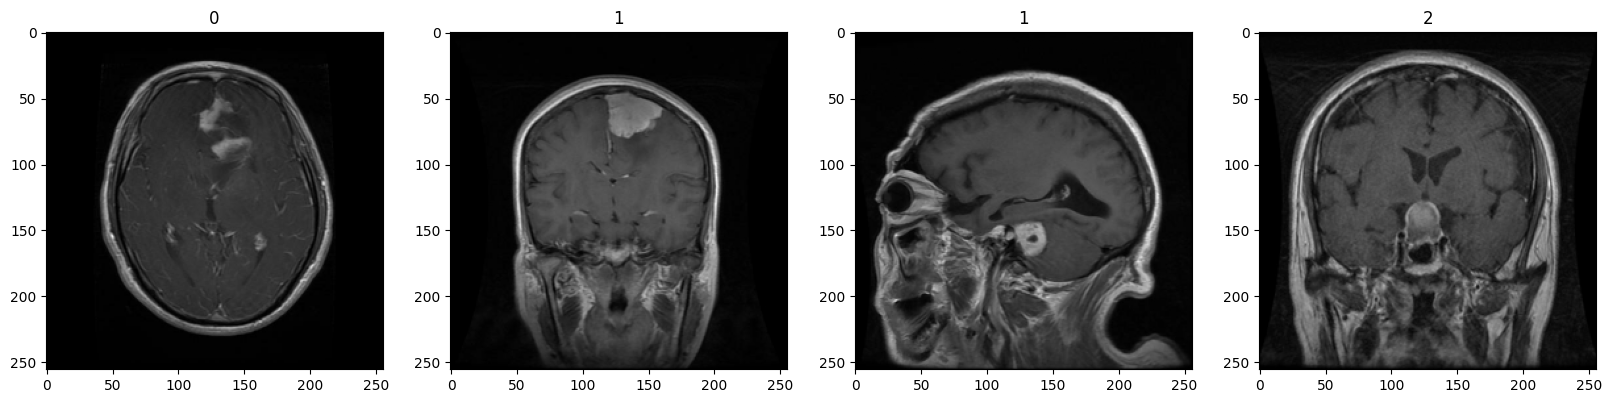

In [147]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [148]:
len(data)

129

In [149]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*0.2)+1

In [150]:
train_size + val_size + test_size

129

In [151]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [152]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten # type: ignore
from tensorflow.keras.utils import to_categorical # type: ignore

In [153]:
model = Sequential()

In [154]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='sigmoid'))


In [155]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [156]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [157]:
from datetime import datetime

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('(%H.%M.%S)') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)

Formatted date with microseconds: 30.Dec.2024.(14.43.10).257186


In [158]:
logdir = fr'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\log_for_no Tumor - Tumor{str(formatted_date)}' # change it to any log file if u were working on this file

In [159]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [160]:
batch[0].max()

1.0

In [161]:
batch[0].min()

0.0

In [162]:
hist = model.fit(train, epochs=32, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/32


90/90 [==============================] - 12s 116ms/step - loss: 0.6539 - accuracy: 0.7017 - val_loss: 0.6569 - val_accuracy: 0.7043
Epoch 2/32
90/90 [==============================] - 10s 108ms/step - loss: 0.3449 - accuracy: 0.8639 - val_loss: 0.2085 - val_accuracy: 0.9255
Epoch 3/32
90/90 [==============================] - 10s 109ms/step - loss: 0.1903 - accuracy: 0.9316 - val_loss: 0.2522 - val_accuracy: 0.9038
Epoch 4/32
90/90 [==============================] - 10s 112ms/step - loss: 0.1099 - accuracy: 0.9611 - val_loss: 0.1829 - val_accuracy: 0.9399
Epoch 5/32
90/90 [==============================] - 10s 112ms/step - loss: 0.0666 - accuracy: 0.9753 - val_loss: 0.1146 - val_accuracy: 0.9663
Epoch 6/32
90/90 [==============================] - 10s 112ms/step - loss: 0.0505 - accuracy: 0.9819 - val_loss: 0.1924 - val_accuracy: 0.9567
Epoch 7/32
90/90 [==============================] - 10s 108ms/step - loss: 0.0277 - accuracy: 0.9927 - val_loss: 0.2053 - val_accuracy: 0.9495
Epoch 8/32

In [163]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

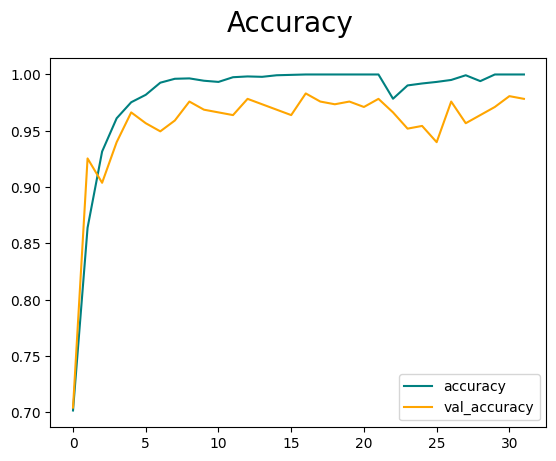

In [164]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="lower right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

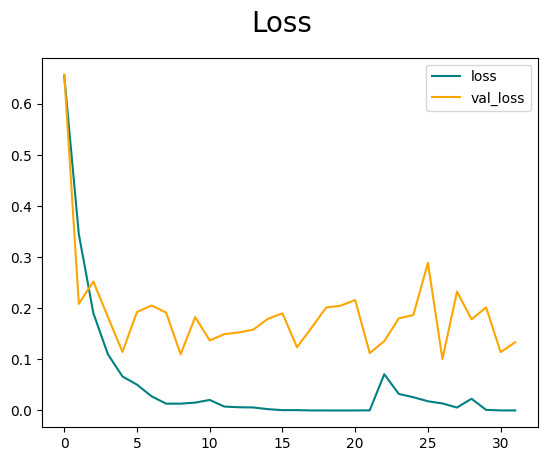

In [165]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right") # 4 options: lower left, lower right, upper left, upper right
plt.show()

In [166]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [167]:
Precision = Precision()
Recall = Recall()
BinAccuracy = BinaryAccuracy()

In [168]:
len(test)

26

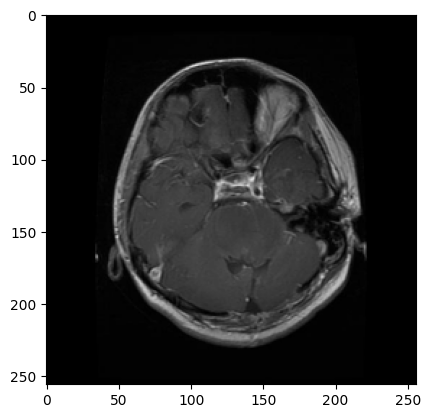

1/1 [==============================] - 0s 37ms/step
Model Prediction: [[9.9999988e-01 6.7281886e-04 1.2718776e-04]]


In [191]:
# Load the image
image_path = fr"C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\Testing\glioma\Te-gl_0010.jpg"  # Replace with the path to your image
img = cv2.imread(image_path)

# Check if the image is loaded correctly
if img is None:
    raise ValueError(f"Image not found or invalid at path: {image_path}")

# Convert BGR (OpenCV default) to RGB for proper visualization
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image using TensorFlow
resize = tf.image.resize(img, (256, 256))

# Visualize the resized image
plt.imshow(resize.numpy().astype(int))  # Convert to int for visualization
plt.show()

# Normalize the resized image and expand dimensions for prediction
model_input = np.expand_dims(resize.numpy().astype("float32") / 255.0, axis=0)

# Predict using the model
yhat = model.predict(model_input)

# Output the prediction
print("Model Prediction:", yhat)

In [192]:
yhat

array([[9.9999988e-01, 6.7281886e-04, 1.2718776e-04]], dtype=float32)

In [194]:
# Get the class with the highest prediction probability
predicted_class = tf.argmax(yhat, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: "Glioma", 1: "Meningioma", 2: "Pituitary"}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label = label_map.get(predicted_class, "Unknown")

# Output the result based on the predicted label
if predicted_label == "Glioma":
    print(f"Image has been Classified as Class 0 (Glioma Detected)")
elif predicted_label == "Meningioma":
    print(f"Image has been Classified as Class 1 (Meningioma Detected)")
elif predicted_label == "Pituitary":
    print(f"Image has been Classified as Class 2 (Pituitary Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 0 (Glioma Detected)


In [195]:
from tensorflow.keras.models import load_model # type: ignore
from datetime import datetime
#import os
#import tensorflow as tf

In [196]:
from datetime import datetime

num_epochs = len(hist.epoch)

# Get the current date and time
current_date = datetime.now()

# Format the date string with microseconds
formatted_date = current_date.strftime('%d.%h.%Y') + '.' + current_date.strftime('%H.%M.%S') + '.' + str(current_date.microsecond)

print("Formatted date with microseconds:", formatted_date)
print("len(hist.epochs) = " + str(num_epochs))

Formatted date with microseconds: 30.Dec.2024.15.00.26.815891
len(hist.epochs) = 32


In [197]:
model.save(os.path.join(r'models',f'3Classes_{formatted_date}_{num_epochs}epochs.h5')) # choose the dir that u want to save ur model at

In [199]:
new_model = load_model(os.path.join(r'models', fr'3Classes_30.Dec.2024.15.00.26.815891_32epochs.h5')) # choose the dir that u want to load ur model from

In [200]:
yhattest = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 98ms/step


In [201]:
# Get the class with the highest prediction probability
predicted_class_test = tf.argmax(yhattest, axis=1).numpy()[0]

# Map the predicted class index to your custom labels
label_map = {0: "Glioma", 1: "Meningioma", 2: "Pituitary"}  # Adjust the index if necessary based on your data setup

# Determine the predicted label
predicted_label_test = label_map.get(predicted_class_test, "Unknown")

# Output the result based on the predicted label
if predicted_label_test == "Glioma":
    print(f"Image has been Classified as Class 0 (Glioma Detected)")
elif predicted_label_test == "Meningioma":
    print(f"Image has been Classified as Class 1 (Meningioma Detected)")
elif predicted_label_test == "Pituitary":
    print(f"Image has been Classified as Class 2 (Pituitary Detected)")
else:
    print("Prediction Error: Unknown class label.")

Image has been Classified as Class 0 (Glioma Detected)


In [203]:
import pandas as pd # type: ignore

# Extracting the metrics
epochs = range(1, len(hist.history['accuracy']) + 1)
accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
validation_loss = hist.history['val_loss']

# Creating a DataFrame with the desired columns
df = pd.DataFrame({
    'Epochs': epochs,
    'Accuracy': accuracy,
    'Validation Accuracy': validation_accuracy,
    'Loss': loss,
    'Validation Loss': validation_loss
})

# Saving the DataFrame to a CSV file
df.to_csv(rf'3ClassesFirstModel.csv', index=False)

In [204]:
# Define the folder path
folderPathGlioma = r'Intracranial-Tumor-Detector/V1.1/Testing/glioma'
folderPathMeningioma = r'Intracranial-Tumor-Detector/V1.1/Testing/meningioma'
folderPathPituitary = r'Intracranial-Tumor-Detector/V1.1/Testing/pituitary'

In [209]:
def predict_folder_tumor_classes(folder_path, model, class_names):
    """
    Predict the class of each image in the folder and calculate statistics.

    Args:
    folder_path (str): Path to the folder containing subfolders for each class.
    model (tf.keras.Model): Trained model for brain tumor classification.
    class_names (list): List of class names (e.g., ['glioma', 'meningioma', 'pituitary']).

    Returns:
    dict: Accuracy and false positive statistics for each class.
    """
    results = {class_name: {"true_positive": 0, "false_positive": 0, "total": 0} for class_name in class_names}

    # Iterate over subfolders for each class
    for class_name in class_names:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.exists(class_folder):
            print(f"Folder for {class_name} not found.")
            continue

        files = os.listdir(class_folder)
        for file in files:
            file_path = os.path.join(class_folder, file)
            
            # Read the image
            img = cv2.imread(file_path)
            if img is None:
                continue

            # Resize the image
            resize = tf.image.resize(img, (256, 256))

            # Normalize and expand dimensions
            img_expanded = np.expand_dims(resize / 255.0, axis=0)

            # Make a prediction
            predictions = model.predict(img_expanded)
            predicted_class = np.argmax(predictions)

            # Update statistics
            if predicted_class == class_names.index(class_name):
                results[class_name]["true_positive"] += 1
            else:
                results[class_names[predicted_class]]["false_positive"] += 1
            results[class_name]["total"] += 1

    # Calculate and print statistics with the true and false counts
    for class_name in class_names:
        if results[class_name]["total"] > 0:
            accuracy = (results[class_name]["true_positive"] / results[class_name]["total"]) * 100
        else:
            accuracy = 0
        print(f"{class_name} - Total Images: {results[class_name]['total']}")
        print(f"{class_name} - True Positives: {results[class_name]['true_positive']}")
        print(f"{class_name} - False Positives: {results[class_name]['false_positive']}")
        print(f"{class_name} - Accuracy: {accuracy:.2f}%")
        print()

    return results

# Define the folder path and class names
folder_path = r"C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1\Testing"
class_names = ['glioma', 'meningioma', 'pituitary']

# Load your trained model
model = tf.keras.models.load_model('C:/Users/shatn/OneDrive/Desktop/GitHubProjects/Intracranial-Tumor-Detector/V1.1/models/3Classes_30.Dec.2024.15.00.26.815891_32epochs.h5')

# Test the dataset
results = predict_folder_tumor_classes(folder_path, model, class_names)


1/1 [==============================] - 0s 17ms/step
glioma - Total Images: 300
glioma - True Positives: 264
glioma - False Positives: 12
glioma - Accuracy: 88.00%

meningioma - Total Images: 306
meningioma - True Positives: 280
meningioma - False Positives: 39
meningioma - Accuracy: 91.50%

pituitary - Total Images: 300
pituitary - True Positives: 294
pituitary - False Positives: 17
pituitary - Accuracy: 98.00%



In [69]:
import tensorflow as tf

# Load the model from the .h5 file
model = tf.keras.models.load_model(fr'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\models\TumorClasses_01.Jan.2025.19.53.15.387435_32epochs.h5')

In [70]:
from tensorflow.keras.preprocessing import image # type: ignore
import numpy as np

# Load and preprocess the image
img_path = r'C:\Users\shatn\OneDrive\Desktop\GitHubProjects\Intracranial-Tumor-Detector\V1.1.1\Tumor Testing\meningioma\Te-me_0012.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(256, 256))  # Resize to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize image (assuming this is how your model was trained)

In [71]:
def generate_gradcam_heatmap(model, img_array, target_layer_name):
    # Get the last convolutional layer
    last_conv_layer = model.get_layer(target_layer_name)
    
    # Create a model that outputs both the predictions and the last conv layer's output
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [last_conv_layer.output, model.output]
    )
    
    # Model prediction and class index
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        tape.watch(conv_outputs)
        class_idx = tf.argmax(predictions[0])
        class_channel = predictions[:, class_idx]
    
    # Gradient calculation
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute weighted sum of feature maps
    conv_outputs = conv_outputs[0].numpy()
    pooled_grads = pooled_grads.numpy()
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, i] *= pooled_grads[i]
    
    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)  # Remove negative values
    heatmap = heatmap / np.max(heatmap)  # Normalize to [0, 1]
    
    return heatmap

C:\Users\shatn\AppData\Local\Temp\ipykernel_3992\1671944033.py:30: RuntimeWarning: invalid value encountered in divide
  heatmap = heatmap / np.max(heatmap)  # Normalize to [0, 1]
C:\Users\shatn\AppData\Local\Temp\ipykernel_3992\3302218905.py:11: RuntimeWarning: invalid value encountered in cast
  heatmap_colored = np.uint8(255 * heatmap_resized)


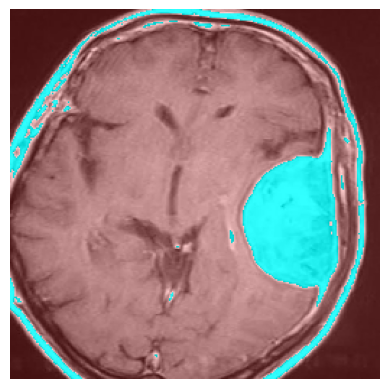

In [72]:
import matplotlib.pyplot as plt
import cv2

# Generate the heatmap for the last convolutional layer (update layer name if needed)
heatmap = generate_gradcam_heatmap(model, img_array, 'conv2d_2')  # Replace 'conv2d_2' with your layer name

# Resize the heatmap to match the original image size
heatmap_resized = cv2.resize(heatmap, (img.size[0], img.size[1]))

# Convert heatmap to color map (jet)
heatmap_colored = np.uint8(255 * heatmap_resized)
heatmap_colored = cv2.applyColorMap(heatmap_colored, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
img_array = np.array(img)
superimposed_img = heatmap_colored * 0.4 + img_array
superimposed_img = np.uint8(superimposed_img)

# Display the result
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()